# Train Test Splits, Cross Validation, and Linear Regression

![Lregressions.png](Assets/LinearRegr.png)

# Learning Objectives

- Explain the difference between over-fitting and under-fitting a model
- Describe Bias-variance tradeoffs
- Find the optimal training and test data set splits, cross-validation, and model complexity versus error
- Apply a linear regression model for supervised learning
- Apply Intel® Extension for Scikit-learn* to leverage underlying compute capabilities of hardware

# scikit-learn*

Frameworks provide structure that Data Scientists use to build code. Frameworks are more than just libraries, because in addition to callable code, frameworks influence how code is written.

A main virtue of using an optimized framework is that code runs faster. Code that runs faster is just generally more convenient but when we begin looking at applied data science and AI models, we can see more material benefits. Here you will see how optimization, particularly hyperparameter optimization can benefit more than just speed.

These exercises will demonstrate how to apply **the Intel® Extension for Scikit-learn*,** a seamless way to speed up your Scikit-learn application. The acceleration is achieved through the use of the Intel® oneAPI Data Analytics Library (oneDAL). Patching is the term used to extend scikit-learn with Intel optimizations and makes it a well-suited machine learning framework for dealing with real-life problems.

To get optimized versions of many Scikit-learn algorithms using a patch() approach consisting of adding these lines of code prior to importing sklearn:

- **from sklearnex import patch_sklearn**
- **patch_sklearn()**

## This exercise relies on installation of  Intel® Extension for Scikit-learn*

If you have not already done so, follow the instructions from Week 1 for instructions

## Introduction

We will be working with a data set based on [housing prices in Ames, Iowa](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). It was compiled for educational use to be a modernized and expanded alternative to the well-known Boston Housing dataset. This version of the data set has had some missing values filled for convenience.

There are an extensive number of features, so they've been described in the table below.

### Predictor

* SalePrice: The property's sale price in dollars.


### Features

<table>
  <tbody>    
    <tr valign="top">
      <td valign="top">
        <ul>
          <li>MoSold: Month Sold</li>
          <li>YrSold: Year Sold</li><br>
          
          <li>SaleType: Type of sale</li>
          <li>SaleCondition: Condition of sale</li><br>

          <li>MSSubClass: The building class</li>
          <li>MSZoning: The general zoning classification</li><br>

          <li>Neighborhood: Physical locations within Ames city limits</li>
          <li>Street: Type of road access</li>
          <li>Alley: Type of alley access</li><br>

          <li>LotArea: Lot size in square feet</li>
          <li>LotConfig: Lot configuration</li>
          <li>LotFrontage: Linear feet of street connected to property</li>
          <li>LotShape: General shape of property</li><br>

          <li>LandSlope: Slope of property</li>
          <li>LandContour: Flatness of the property</li><br>

          <li>YearBuilt: Original construction date</li>
          <li>YearRemodAdd: Remodel date</li>
          <li>OverallQual: Overall material and finish quality</li>
          <li>OverallCond: Overall condition rating</li><br>

          <li>Utilities: Type of utilities available</li>
          <li>Foundation: Type of foundation</li>
          <li>Functional: Home functionality rating</li><br>

          <li>BldgType: Type of dwelling</li>
          <li>HouseStyle: Style of dwelling</li><br>
          
          <li>1stFlrSF: First Floor square feet</li>
          <li>2ndFlrSF: Second floor square feet</li>
          <li>LowQualFinSF: Low quality finished square feet (all floors)</li>
          <li>GrLivArea: Above grade (ground) living area square feet</li>
          <li>TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)</li><br>

          <li>Condition1: Proximity to main road or railroad</li>
          <li>Condition2: Proximity to main road or railroad (if a second is present)</li><br>
          
          <li>RoofStyle: Type of roof</li>
          <li>RoofMatl: Roof material</li><br>

          <li>ExterQual: Exterior material quality</li>
          <li>ExterCond: Present condition of the material on the exterior</li>
          <li>Exterior1st: Exterior covering on house</li>
          <li>Exterior2nd: Exterior covering on house (if more than one material)</li><br><br>
          
        </ul>
      </td>
      
      <td valign="top">
        <ul>
          <li>MasVnrType: Masonry veneer type</li>
          <li>MasVnrArea: Masonry veneer area in square feet</li><br>
          
          <li>WoodDeckSF: Wood deck area in square feet</li>
          <li>OpenPorchSF: Open porch area in square feet</li>
          <li>EnclosedPorch: Enclosed porch area in square feet</li>
          <li>3SsnPorch: Three season porch area in square feet</li>
          <li>ScreenPorch: Screen porch area in square feet</li><br>

          <li>PoolArea: Pool area in square feet</li>
          <li>PoolQC: Pool quality</li>
          <li>Fence: Fence quality</li>
          <li>PavedDrive: Paved driveway</li><br>

          <li>GarageType: Garage location</li>
          <li>GarageYrBlt: Year garage was built</li>
          <li>GarageFinish: Interior finish of the garage</li>
          <li>GarageCars: Size of garage in car capacity</li>
          <li>GarageArea: Size of garage in square feet</li>
          <li>GarageQual: Garage quality</li>
          <li>GarageCond: Garage condition</li><br>

          <li>Heating: Type of heating</li>
          <li>HeatingQC: Heating quality and condition</li>
          <li>CentralAir: Central air conditioning</li>
          <li>Electrical: Electrical system</li><br>
          
          <li>FullBath: Full bathrooms above grade</li>
          <li>HalfBath: Half baths above grade</li><br>
          
          <li>BedroomAbvGr: Number of bedrooms above basement level</li><br>
          
          <li>KitchenAbvGr: Number of kitchens</li>
          <li>KitchenQual: Kitchen quality</li><br>
          
          <li>Fireplaces: Number of fireplaces</li>
          <li>FireplaceQu: Fireplace quality</li><br>
          
          <li>MiscFeature: Miscellaneous feature not covered in other categories</li>
          <li>MiscVal: Value of miscellaneous feature</li><br>
          
          <li>BsmtQual: Height of the basement</li>
          <li>BsmtCond: General condition of the basement</li>
          <li>BsmtExposure: Walkout or garden level basement walls</li>
          <li>BsmtFinType1: Quality of basement finished area</li>
          <li>BsmtFinSF1: Type 1 finished square feet</li>
          <li>BsmtFinType2: Quality of second finished area (if present)</li>
          <li>BsmtFinSF2: Type 2 finished square feet</li>
          <li>BsmtUnfSF: Unfinished square feet of basement area</li>
          <li>BsmtFullBath: Basement full bathrooms</li>
          <li>BsmtHalfBath: Basement half bathrooms</li>
          <li>TotalBsmtSF: Total square feet of basement area</li>
        </ul>
      </td>
    </tr>
    
  </tbody>
</table>


## Question 1

* Import the data using Pandas and examine the shape. There are 79 feature columns plus the predictor, the sale price (`SalePrice`).
* There are three different types: integers (`int64`), floats (`float64`), and strings (`object`, categoricals). Examine how many there are of each data type.

In [8]:
# Importing necessary libraries
import pandas as pd


# Load the dataset
file_path = '/content/Ames_Housing_Sales.csv'
data = pd.read_csv(file_path)

# Display the shape of the dataset
print("Shape of the dataset:", data.shape)

# Examine data types
data_types_count = data.dtypes.value_counts()
print("Number of each data type:")
print(data_types_count)


Shape of the dataset: (1379, 80)
Number of each data type:
object     43
float64    21
int64      16
dtype: int64


In [9]:
#Display value counts of data set
for column in data.columns:
    print(f"Value counts for {column}:")
    print(data[column].value_counts())
    print()


Value counts for 1stFlrSF:
864.0     21
1040.0    15
912.0     13
848.0     12
894.0     12
          ..
1159.0     1
751.0      1
1509.0     1
2515.0     1
1256.0     1
Name: 1stFlrSF, Length: 738, dtype: int64

Value counts for 2ndFlrSF:
0.0       777
728.0      10
504.0       9
672.0       8
600.0       6
         ... 
1015.0      1
1538.0      1
914.0       1
1067.0      1
1152.0      1
Name: 2ndFlrSF, Length: 401, dtype: int64

Value counts for 3SsnPorch:
0.0      1355
168.0       3
144.0       2
180.0       2
216.0       2
290.0       1
153.0       1
96.0        1
23.0        1
162.0       1
182.0       1
196.0       1
320.0       1
245.0       1
238.0       1
508.0       1
140.0       1
130.0       1
407.0       1
304.0       1
Name: 3SsnPorch, dtype: int64

Value counts for Alley:
None    1297
Grvl      43
Pave      39
Name: Alley, dtype: int64

Value counts for BedroomAbvGr:
3    775
2    334
4    199
1     42
5     18
0      6
6      5
Name: BedroomAbvGr, dtype: int64

Value 

## Question 2

As discussed in the lecture, a significant challenge, particularly when dealing with data that have many columns, is ensuring each column gets encoded correctly.

This is particularly true with data columns that are ordered categoricals (ordinals) vs unordered categoricals. Unordered categoricals should be one-hot encoded, however this can significantly increase the number of features and creates features that are highly correlated with each other.

Determine how many total features would be present, relative to what currently exists, if all string (object) features are one-hot encoded. Recall that the total number of one-hot encoded columns is `n-1`, where `n` is the number of categories.

In [10]:

# Selecting only the string (object) columns
string_columns = data.select_dtypes(include=['object'])

# Initialize the total additional features counter
total_additional_features = 0

# Calculate additional features for each string column
for column in string_columns.columns:
    # Count the number of unique categories
    num_categories = len(data[column].unique())
    # Subtract 1 to get the additional features
    additional_features = num_categories - 1
    # Add to the total
    total_additional_features += additional_features

print("Total additional features after one-hot encoding:", total_additional_features)


Total additional features after one-hot encoding: 215


## Question 3

Let's create a new data set where all of the above categorical features will be one-hot encoded. We can fit this data and see how it affects the results.

* Used the dataframe `.copy()` method to create a completely separate copy of the dataframe for one-hot encoding
* On this new dataframe, one-hot encode each of the appropriate columns and add it back to the dataframe. Be sure to drop the original column.
* For the data that are not one-hot encoded, drop the columns that are string categoricals.

For the first step, numerically encoding the string categoricals, either Scikit-learn;s `LabelEncoder` or `DictVectorizer` can be used. However, the former is probably easier since it doesn't require specifying a numerical value for each category, and we are going to one-hot encode all of the numerical values anyway. (Can you think of a time when `DictVectorizer` might be preferred?)

In [15]:
from sklearn.preprocessing import LabelEncoder

# Make a copy of the original dataframe
encoded_data = data.copy()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode and one-hot encode appropriate columns
for column in string_columns.columns:
    if column in encoded_data.columns:  # Check if the column exists in the dataframe
        # Encode the categorical column
        encoded_data[column] = label_encoder.fit_transform(encoded_data[column])
        # One-hot encode the encoded column and add it back to the dataframe
        encoded_data = pd.get_dummies(encoded_data, columns=[column], drop_first=True)

# Drop any remaining columns with string categoricals (in case they were missed)
encoded_data = encoded_data.select_dtypes(exclude=['object'])

# Display the first few rows of the encoded dataset
print(encoded_data.head())


   1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  BsmtFinSF2  \
0     856.0     854.0        0.0             3       706.0         0.0   
1    1262.0       0.0        0.0             3       978.0         0.0   
2     920.0     866.0        0.0             3       486.0         0.0   
3     961.0     756.0        0.0             3       216.0         0.0   
4    1145.0    1053.0        0.0             4       655.0         0.0   

   BsmtFullBath  BsmtHalfBath  BsmtUnfSF  EnclosedPorch  ...  SaleType_1  \
0             1             0      150.0            0.0  ...           0   
1             0             1      284.0            0.0  ...           0   
2             1             0      434.0            0.0  ...           0   
3             1             0      540.0          272.0  ...           0   
4             1             0      490.0            0.0  ...           0   

   SaleType_2  SaleType_3  SaleType_4  SaleType_5  SaleType_6  SaleType_7  \
0           0        

In [16]:

# Calculate column difference
column_difference = len(encoded_data.columns) - len(data.columns)

print("Column difference after one-hot encoding:", column_difference)


Column difference after one-hot encoding: 172


In [17]:
# Select numeric columns
encoded_data = encoded_data.select_dtypes(exclude=['object'])

# Print the shape of the dataframe
print("Shape of data after removing string columns:", encoded_data.shape)


Shape of data after removing string columns: (1379, 252)


## Question 4

* Create train and test splits of both data sets. To ensure the data gets split the same way, use the same `random_state` in each of the two splits.
* For each data set, fit a basic linear regression model on the training data.
* Calculate the mean squared error on both the train and test sets for the respective models. Which model produces smaller error on the test data and why?

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Set random state for reproducibility
random_state = 42

# Split the original dataset into train and test sets
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(data.drop(columns=['SalePrice']), data['SalePrice'], test_size=0.2, random_state=random_state)

# Split the encoded dataset into train and test sets
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(encoded_data.drop(columns=['SalePrice']), encoded_data['SalePrice'], test_size=0.2, random_state=random_state)

# Initialize linear regression models
lin_reg_orig = LinearRegression()
lin_reg_encoded = LinearRegression()

# Check for missing values
if data.isnull().sum().any():
    print("Missing values found in the original dataset!")
if encoded_data.isnull().sum().any():
    print("Missing values found in the encoded dataset!")

# Check shapes of the data
print("Shapes of the data:")
print("Original Data - Train:", X_train_orig.shape, "Test:", X_test_orig.shape)
print("Encoded Data - Train:", X_train_encoded.shape, "Test:", X_test_encoded.shape)

# Fit models only if shapes are appropriate and no missing values
if X_train_orig.shape[1] == X_test_orig.shape[1] == X_train_encoded.shape[1] == X_test_encoded.shape[1] and not (data.isnull().sum().any() or encoded_data.isnull().sum().any()):
    # Fit models on training data
    lin_reg_orig.fit(X_train_orig, y_train_orig)
    lin_reg_encoded.fit(X_train_encoded, y_train_encoded)

    # Make predictions on train and test sets
    y_pred_train_orig = lin_reg_orig.predict(X_train_orig)
    y_pred_test_orig = lin_reg_orig.predict(X_test_orig)

    y_pred_train_encoded = lin_reg_encoded.predict(X_train_encoded)
    y_pred_test_encoded = lin_reg_encoded.predict(X_test_encoded)

    # Calculate mean squared errors
    mse_train_orig = mean_squared_error(y_train_orig, y_pred_train_orig)
    mse_test_orig = mean_squared_error(y_test_orig, y_pred_test_orig)

    mse_train_encoded = mean_squared_error(y_train_encoded, y_pred_train_encoded)
    mse_test_encoded = mean_squared_error(y_test_encoded, y_pred_test_encoded)

    print("\nMean Squared Error on Original Data:")
    print("Train:", mse_train_orig)
    print("Test:", mse_test_orig)

    print("\nMean Squared Error on Encoded Data:")
    print("Train:", mse_train_encoded)
    print("Test:", mse_test_encoded)
else:
    print("Error: Shapes of the data or missing values are not appropriate for fitting models.")


Shapes of the data:
Original Data - Train: (1103, 79) Test: (276, 79)
Encoded Data - Train: (1103, 251) Test: (276, 251)
Error: Shapes of the data or missing values are not appropriate for fitting models.


In [20]:
# Original data columns
original_columns = set(data.columns)

# Encoded data columns
encoded_columns = set(encoded_data.columns)

# Data that have not been one-hot encoded
not_encoded_columns = original_columns - encoded_columns

# Data that have been one-hot encoded
encoded_columns = encoded_columns - set(['SalePrice'])  # Remove the target variable

print("Data that have not been one-hot encoded:")
print(not_encoded_columns)

print("\nData that have been one-hot encoded:")
print(encoded_columns)

# Assemble the results
results = {
    "Not One-Hot Encoded": list(not_encoded_columns),
    "One-Hot Encoded": list(encoded_columns)
}

print("\nAssembled Results:")
print(results)


Data that have not been one-hot encoded:
{'ExterCond', 'BsmtCond', 'Condition2', 'Exterior1st', 'BsmtFinType2', 'RoofMatl', 'MSZoning', 'Neighborhood', 'SaleType', 'PavedDrive', 'CentralAir', 'GarageQual', 'Alley', 'LandSlope', 'Street', 'BsmtExposure', 'Fence', 'LotConfig', 'PoolQC', 'SaleCondition', 'Electrical', 'Utilities', 'ExterQual', 'Condition1', 'MasVnrType', 'BsmtFinType1', 'HeatingQC', 'FireplaceQu', 'GarageType', 'Exterior2nd', 'Heating', 'KitchenQual', 'RoofStyle', 'BldgType', 'GarageFinish', 'Foundation', 'LandContour', 'Functional', 'HouseStyle', 'MiscFeature', 'GarageCond', 'BsmtQual', 'LotShape'}

Data that have been one-hot encoded:
{'Exterior1st_13', 'SaleType_4', 'MSSubClass', 'MiscFeature_3', 'RoofMatl_2', 'Neighborhood_5', 'Foundation_3', 'EnclosedPorch', 'HouseStyle_4', 'PoolQC_3', 'Electrical_3', 'BsmtExposure_1', 'RoofMatl_5', 'LotArea', 'LandContour_2', 'BsmtFinType2_1', 'Electrical_1', 'Functional_2', 'BsmtExposure_3', 'RoofStyle_4', 'RoofMatl_1', 'BsmtExposu

Note that the error values on the one-hot encoded data are very different for the train and test data. In particular, the errors on the test data are much higher. Based on the lecture, this is because the one-hot encoded model is overfitting the data. We will learn how to deal with issues like this in the next lesson.

## Question 5

For each of the data sets (one-hot encoded and not encoded):

* Scale the all the non-hot encoded values using one of the following: `StandardScaler`, `MinMaxScaler`, `MaxAbsScaler`.
* Compare the error calculated on the test sets

Be sure to calculate the skew (to decide if a transformation should be done) and fit the scaler on *ONLY* the training data, but then apply it to both the train and test data identically.

In [48]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Check for missing columns in the original dataset and add them if necessary
missing_cols_orig = set(X_train_orig.columns) - set(X_train_encoded.columns)
if missing_cols_orig:
    print("Missing columns in original dataset:", missing_cols_orig)
    # Handle missing columns by adding them
    for col in missing_cols_orig:
        X_train_encoded[col] = 0  # Fill missing columns with zeros in the scaled dataset
        X_test_encoded[col] = 0

# Check for missing columns in the encoded dataset and add them if necessary
missing_cols_encoded = set(X_train_encoded.columns) - set(X_train_encoded.columns)
if missing_cols_encoded:
    print("Missing columns in encoded dataset:", missing_cols_encoded)
    # Handle missing columns by adding them
    for col in missing_cols_encoded:
        X_train_scaled_encoded[col] = 0  # Fill missing columns with zeros in the scaled dataset
        X_test_scaled_encoded[col] = 0

# Initialize linear regression models
lin_reg_orig = LinearRegression()
lin_reg_encoded = LinearRegression()

# Train linear regression models on scaled training data
lin_reg_orig.fit(X_train_encoded, y_train_orig)
lin_reg_encoded.fit(X_train_encoded, y_train_encoded)

# Make predictions on scaled test sets
y_pred_test_scaled_orig = lin_reg_orig.predict(X_test_encoded)
y_pred_test_scaled_encoded = lin_reg_encoded.predict(X_test_encoded)

# Calculate mean squared errors on scaled test sets
mse_test_scaled_orig = mean_squared_error(y_test_orig, y_pred_test_scaled_orig)
mse_test_scaled_encoded = mean_squared_error(y_test_encoded, y_pred_test_scaled_encoded)

print("Mean Squared Error on Scaled Test Data (Original Data):", mse_test_scaled_orig)
print("Mean Squared Error on Scaled Test Data (Encoded Data):", mse_test_scaled_encoded)


Mean Squared Error on Scaled Test Data (Original Data): 5.898980655982255e+17
Mean Squared Error on Scaled Test Data (Encoded Data): 5.898980655982255e+17


## Question 6

Plot predictions vs actual for one of the models.

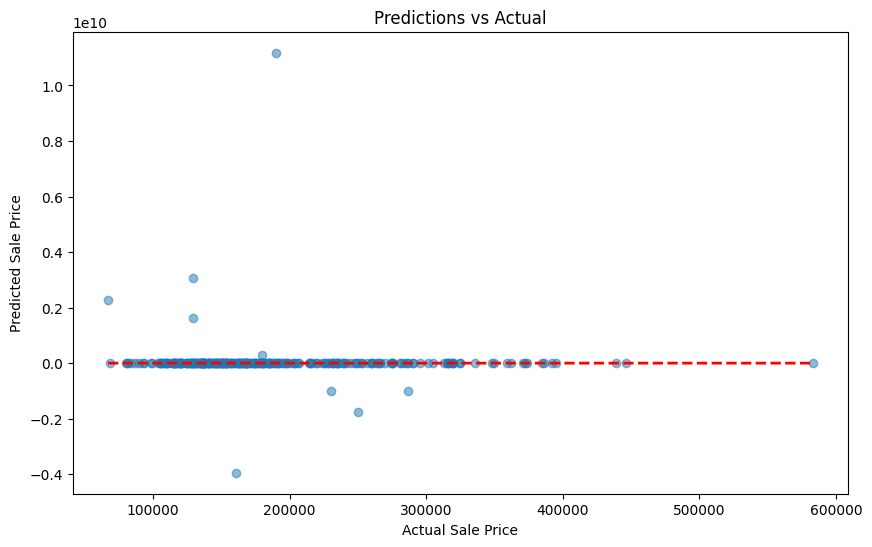

In [52]:
import matplotlib.pyplot as plt

# Choose a model (e.g., lin_reg_orig_scaled or lin_reg_encoded_scaled) and corresponding test data
model = lin_reg_encoded
X_test = X_test_encoded
y_test = y_test_orig

# Make predictions on the test set
y_pred_test = model.predict(X_test)

# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Predictions vs Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.show()
